
# 🎯 Demonstrating Overfitting in Neural Networks with TensorFlow

In this notebook, we intentionally create a scenario that leads to **overfitting**. Overfitting occurs when a model learns the training data too well, including noise and details that don't generalize to unseen data.

---

## ✅ Key Characteristics of Overfitting
- Complex model architecture
- Small training dataset
- Lack of regularization
- Training for too many epochs

---


In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import random


## 📥 Load and Preprocess MNIST Dataset

In [2]:

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split validation set
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Flatten images
x_train = x_train.reshape((-1, 28 * 28))
x_val = x_val.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))


## 🔍 Reduce Dataset to Simulate Overfitting

In [3]:

# Take only 1000 training samples
x_small_train = x_train[:300]
y_small_train = y_train[:300]


[0 1 2 3 4 5 6 7 8 9] [34 39 28 34 32 23 29 29 21 31]


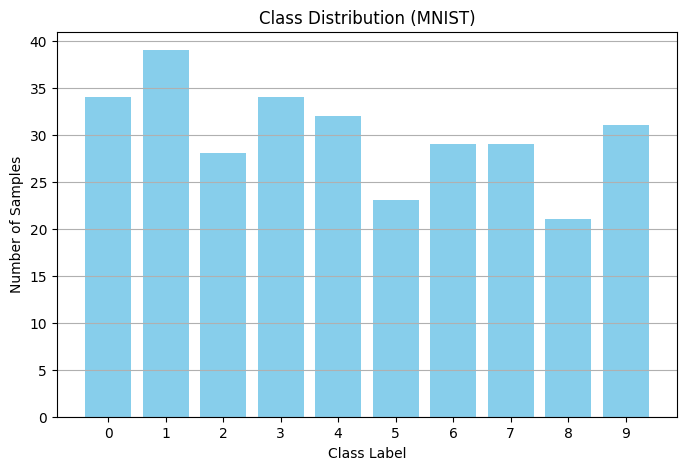

In [4]:
# Plot the bar chart
classes, counts = np.unique(y_small_train, return_counts=True)
print(classes, counts)
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, tick_label=[str(c) for c in classes], color='skyblue')
plt.title("Class Distribution (MNIST)")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()

## 🧠 Define a Complex Model Architecture

In [5]:

def overfitting_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


## 🚂 Train the Model (Expect Overfitting)

In [6]:

model = overfitting_model()
history = model.fit(
    x_small_train, y_small_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/50
10/10 - 2s - 249ms/step - accuracy: 0.4967 - loss: 1.7822 - val_accuracy: 0.6736 - val_loss: 1.1717
Epoch 2/50
10/10 - 1s - 107ms/step - accuracy: 0.8133 - loss: 0.6575 - val_accuracy: 0.7523 - val_loss: 0.8285
Epoch 3/50
10/10 - 1s - 100ms/step - accuracy: 0.8667 - loss: 0.3660 - val_accuracy: 0.7364 - val_loss: 1.0997
Epoch 4/50
10/10 - 1s - 102ms/step - accuracy: 0.9567 - loss: 0.1595 - val_accuracy: 0.7698 - val_loss: 0.8007
Epoch 5/50
10/10 - 1s - 100ms/step - accuracy: 0.9700 - loss: 0.0872 - val_accuracy: 0.8063 - val_loss: 0.7677
Epoch 6/50
10/10 - 1s - 101ms/step - accuracy: 0.9900 - loss: 0.0389 - val_accuracy: 0.8271 - val_loss: 0.6887
Epoch 7/50
10/10 - 1s - 99ms/step - accuracy: 0.9967 - loss: 0.0154 - val_accuracy: 0.8261 - val_loss: 0.7527
Epoch 8/50
10/10 - 1s - 100ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.8294 - val_loss: 0.7488
Epoch 9/50
10/10 - 1s - 97ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8251 - val_loss: 0.7988
Epo

## 📊 Plot Training vs Validation Performance

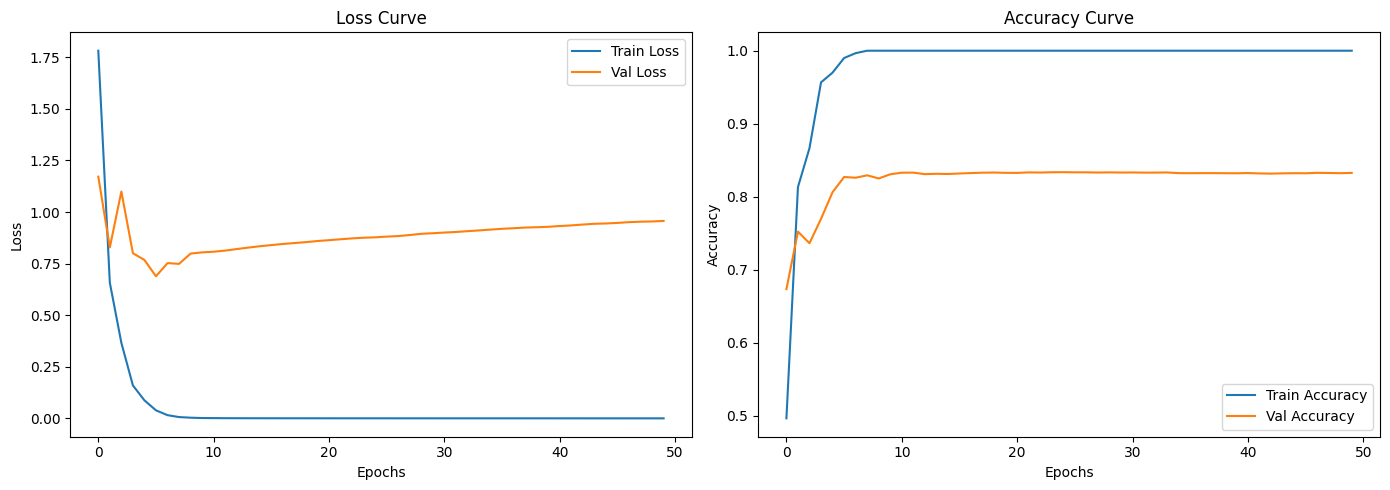

In [7]:

def plot_history(history):
    plt.figure(figsize=(14, 5))
    
    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)



---
## 🧠 Observations

- **Training Accuracy**: Near perfect (close to 100%)
- **Validation Accuracy**: Peaks and then drops or stagnates
- **Validation Loss**: Increases after initial epochs

This is a classic sign of **overfitting** — the model memorizes the small training data but performs poorly on unseen validation data.

---


In [8]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(y_test[0:10])
# Show results
print(f"Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0:10])


print("Accuracy Report:\n", classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8010 - loss: 1.1136
[7 2 1 0 4 1 4 9 5 9]
Accuracy: 0.8234, Loss: 1.0132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[7 2 1 0 4 1 4 9 2 9]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       980
           1       0.93      0.95      0.94      1135
           2       0.79      0.84      0.82      1032
           3       0.83      0.77      0.80      1010
           4       0.78      0.86      0.82       982
           5       0.77      0.66      0.71       892
           6       0.90      0.84      0.87       958
           7       0.82      0.86      0.84      1028
           8       0.77      0.73      0.75       974
           9       0.76      0.73      0.74      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted label: 0.2


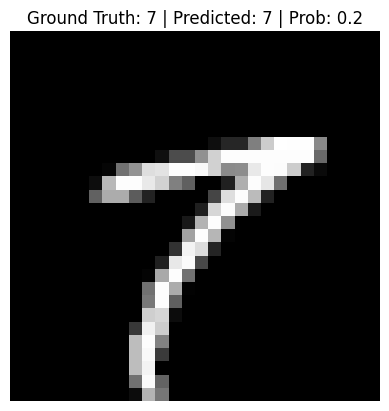

In [9]:

# Pick a random test sample
index = random.randint(0, x_test.shape[0] - 1)
sample_image = x_test[index].reshape(1, 784)  # Flatten for model input
ground_truth = y_test[index]

# Predict the label
logits = model.predict(sample_image)
# print(logits)
predicted_label = np.argmax(logits)

probabilities = str(tf.nn.softmax(logits).numpy()[0][predicted_label])[0:3]
# Print the probabilities
print(f"Predicted label: {probabilities}")
# Reshape back to 28x28 for visualization
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Ground Truth: {ground_truth} | Predicted: {predicted_label} | Prob: {probabilities}")
plt.axis('off')
plt.show()